#                                       Healthcare Project


## Problem Statement:

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

Build a model to accurately predict whether the patients in the dataset have diabetes or not.


## Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [250]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline


In [251]:
# Importing Datasets

hcare_data = pd.read_csv("health care diabetes.csv")

In [252]:
hcare_data.shape

(768, 9)

In [253]:
hcare_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [254]:
hcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [255]:
hcare_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [256]:
hcare_data.Insulin.mean()

79.79947916666667

In [257]:
hcare_data.BloodPressure.mean()

69.10546875

In [258]:
hcare_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [259]:
zero_list = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
zero_data = (hcare_data[zero_list] == 0).sum()
zero_data

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [260]:
# Replacing the zero values with Nan

hcare_data[zero_list] = hcare_data[zero_list].replace(0, np.nan)

hcare_data.isnull().sum()

# Replacing the Nan values with mean values

hcare_data.fillna(hcare_data.mean(), inplace = True)

hcare_data.isnull().sum()

hcare_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [261]:
#hcare_data.info()

#hcare_data['Glucose','BloodPressure','SkinThickness','Insulin'] = hcare_data['Glucose','BloodPressure','SkinThickness','Insulin'].astype('int64')

hcare_data['Glucose'] = hcare_data['Glucose'].astype('int64')
hcare_data['BloodPressure'] = hcare_data['BloodPressure'].astype('int64')
hcare_data['SkinThickness'] = hcare_data['SkinThickness'].astype('int64')
hcare_data['Insulin'] = hcare_data['Insulin'].astype('int64')

hcare_data.info()
hcare_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33.600000,0.627,50,1
1,1,85,66,29,155,26.600000,0.351,31,0
2,8,183,64,29,155,23.300000,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,0,137,40,35,168,43.100000,2.288,33,1
5,5,116,74,29,155,25.600000,0.201,30,0
6,3,78,50,32,88,31.000000,0.248,26,1
7,10,115,72,29,155,35.300000,0.134,29,0
8,2,197,70,45,543,30.500000,0.158,53,1
9,8,125,96,29,155,32.457464,0.232,54,1


<Figure size 72000x57600 with 0 Axes>

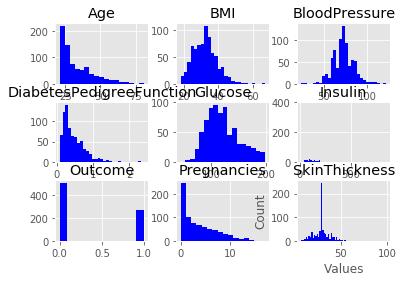

In [262]:
# Visually exploring these variables using histograms.

plt.style.use('ggplot')
plt.figure(figsize=(1000,800))
hcare_data.hist(bins='auto',color='blue')
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()

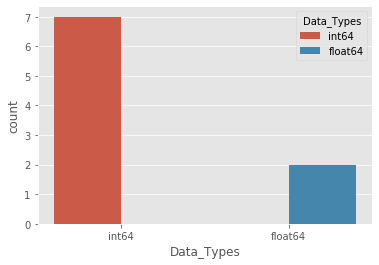

In [263]:
# Count (frequency) plot describing the data types and the count of variables. 

h_datatypes = hcare_data.dtypes
h_datatypes
h_datatypes.to_csv('h_dtypes.csv',header=["Data_Types"],index=False)
h_dtypes = pd.read_csv('h_dtypes.csv')
#h_dtypes.head()
h_data_plt = sns.countplot(x="Data_Types", hue = "Data_Types", data=h_dtypes)
plt.show()

## Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

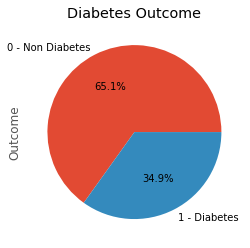

In [264]:
# Plotting the count of outcomes by their value

labels = '0 - Non Diabetes', '1 - Diabetes'
hcare_data['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', labels = labels)
plt.title("Diabetes Outcome") 
plt.show()

In [ ]:
# Scatter charts between the pair of variables to understand the relationships

sns.pairplot(hcare_data, hue = 'Outcome')


In [ ]:
# Performing correlation analysis visualizing it with heat map

plt.figure(figsize=(10,10))
sns.heatmap(hcare_data.corr(), annot = True, cmap = 'coolwarm')

In [ ]:
hcare_data.columns

corr_cols = hcare_data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']]

plt.figure(figsize=(10,10))
sns.heatmap(corr_cols.corr(), annot = True, cmap = 'coolwarm')

## Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [ ]:
#Train and Test Split the data

from sklearn.model_selection import train_test_split

#Splitting the data
X = hcare_data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']]

y = hcare_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split( X , y, test_size=0.2)


In [ ]:
# Strategies for model building

# k-fold cross validation evaluation of xgboost model

import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model

model = xgboost.XGBClassifier()

kfold = KFold(n_splits=10, random_state=7)

results = cross_val_score(model, X, y, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
# Applying an appropriate classification algorithm to build a model and comparing with the results from KNN algorithm.

# Predict the accuracy using random forest classifier.

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

# Imported scikit-learn metrics module for accuracy calculation

from sklearn import metrics

print("Accuracy: %.2f%% " % ((metrics.accuracy_score(y_test, y_pred))*100))

In [ ]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0) 

classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)

print ("Accuracy : %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100))


In [ ]:
# Applying KNN Algorithm

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7) 

knn.fit(X_train, y_train)

pred_matrix = knn.predict(X_test)
print(pred_matrix)

acc_res = knn.score(X_test, y_test)

print("Accuracy: %.2f%% " % (acc_res*100))


## Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [ ]:
# Classification report by analyzing sensitivity, specificity, AUC (ROC curve)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Cross-validated AUC

cross_val_score(classifier, X, y, cv=10, scoring='roc_auc').mean()

In [ ]:
# Confusion Matrix

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
confusion_mat


In [ ]:
print('True', y_test.values[0:25])
print('Pred', y_pred[0:25])

TP = confusion_mat[1, 1]
TN = confusion_mat[0, 0]
FP = confusion_mat[0, 1]
FN = confusion_mat[1, 0]

In [ ]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

In [ ]:
specificity = TN / (TN + FP)

print(specificity)

In [ ]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

In [ ]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)